In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)

In [3]:
tend = 400
dt   = 0.1

numNeurons = 20
neurons = []

for i in range(numNeurons):
    if i==0 or i==1:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend,a=0.8,b=0.7,tau=12.5,I=I)
    n.SetFlow(n.FHNFlow)
    neurons.append(n)
    


b = Brain(neurons=neurons,dt=dt,tend=tend)
b.Simulate()

# Network formed between neurons

As the simulation is running, synapses are forming at random between neurons. These connections are shown in the following visualization. The numbers on the nodes are neuron ID's, and the label on the edges correspond to the time at which the connection was formed. 

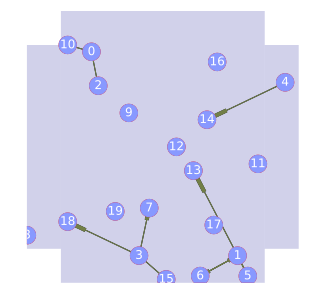

In [4]:
plt.rcParams["figure.figsize"] = (5,5)
b.DrawNetwork(edgelabels=False)

Note: The connections are directed since synapses are one sided connections. 

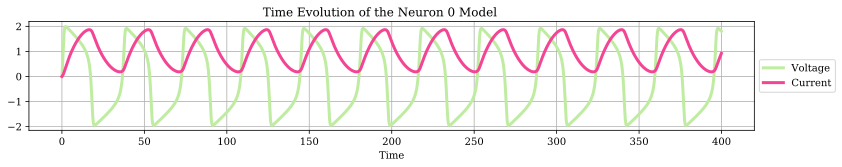

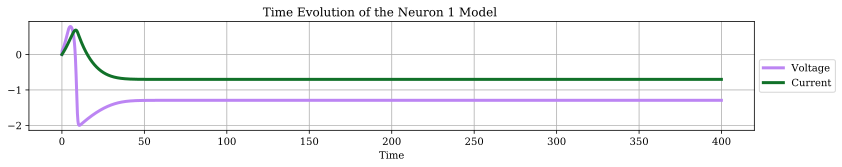

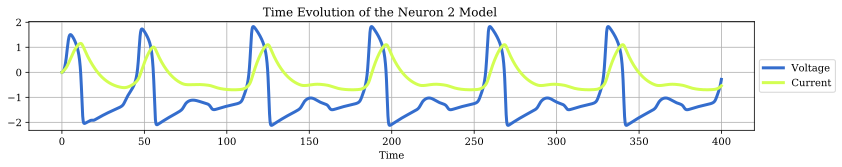

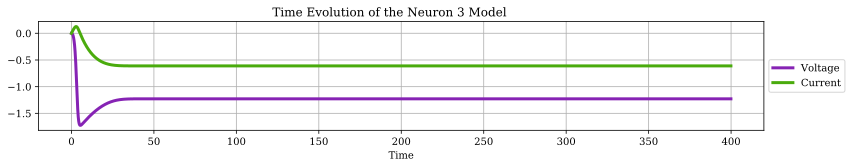

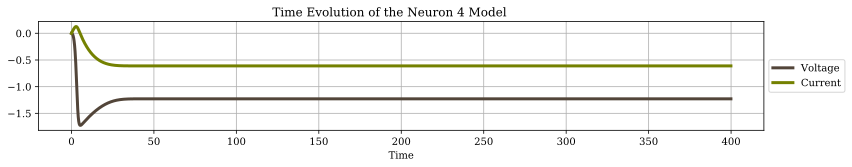

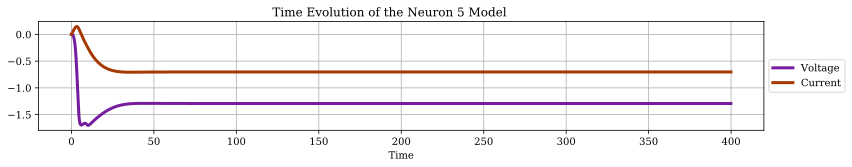

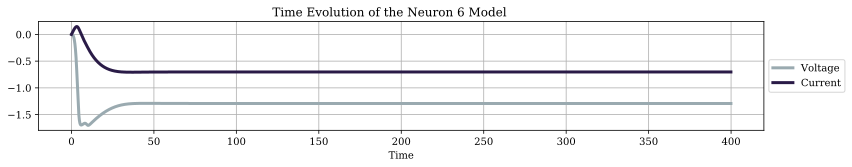

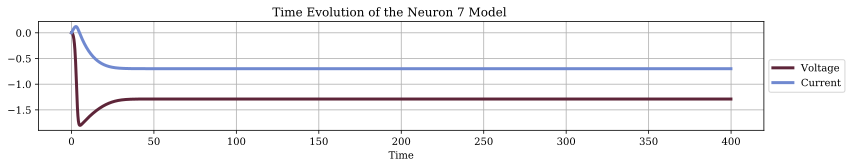

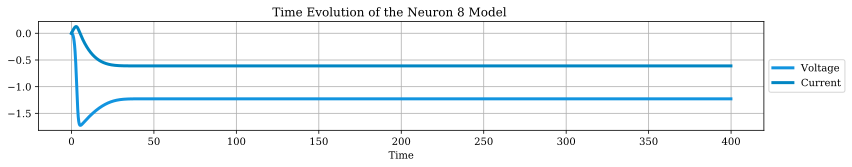

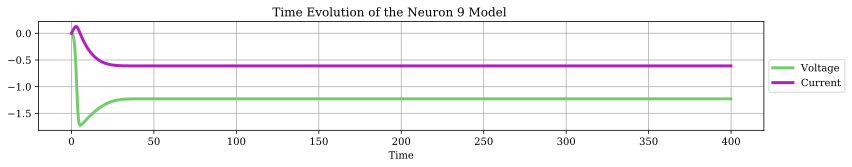

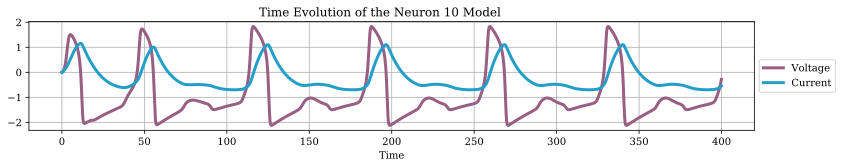

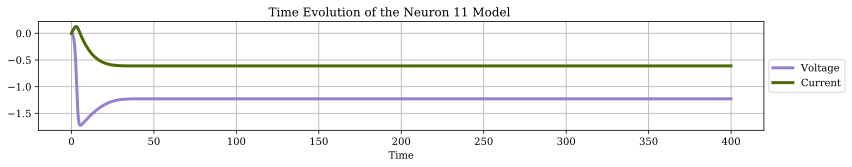

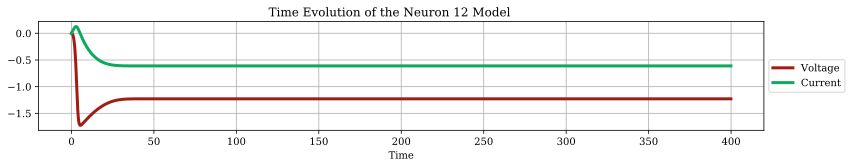

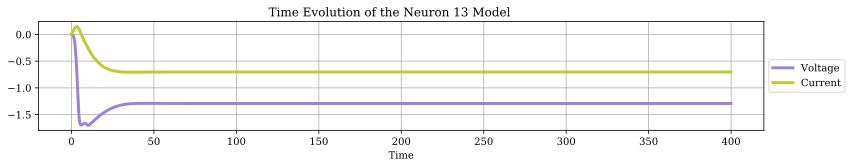

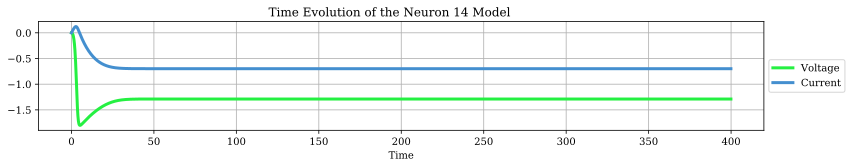

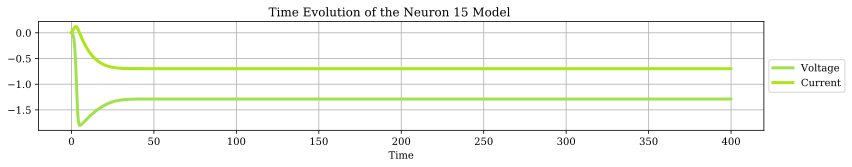

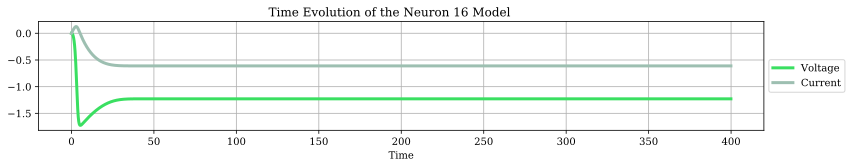

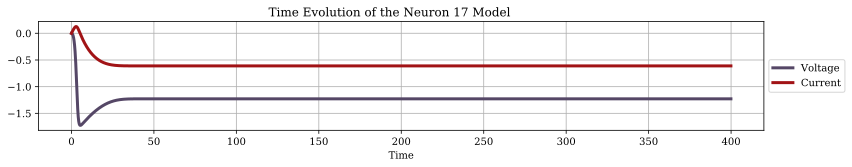

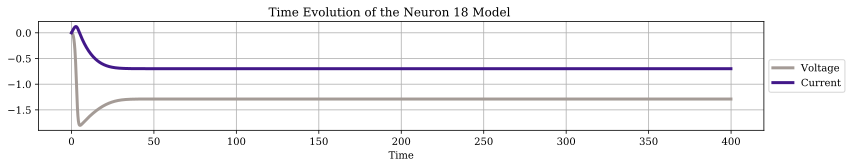

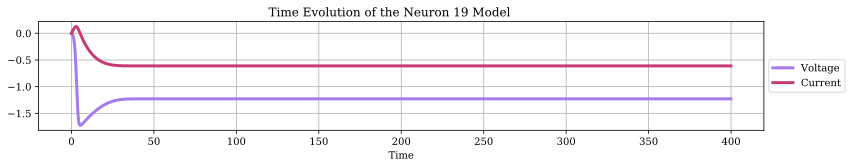

In [5]:
plt.rcParams["figure.figsize"] = (13, 2)
for n in range(numNeurons):
    b._Neurons[n].PlotState(states={0:"V",1:"w"},legend=["Voltage","Current"])

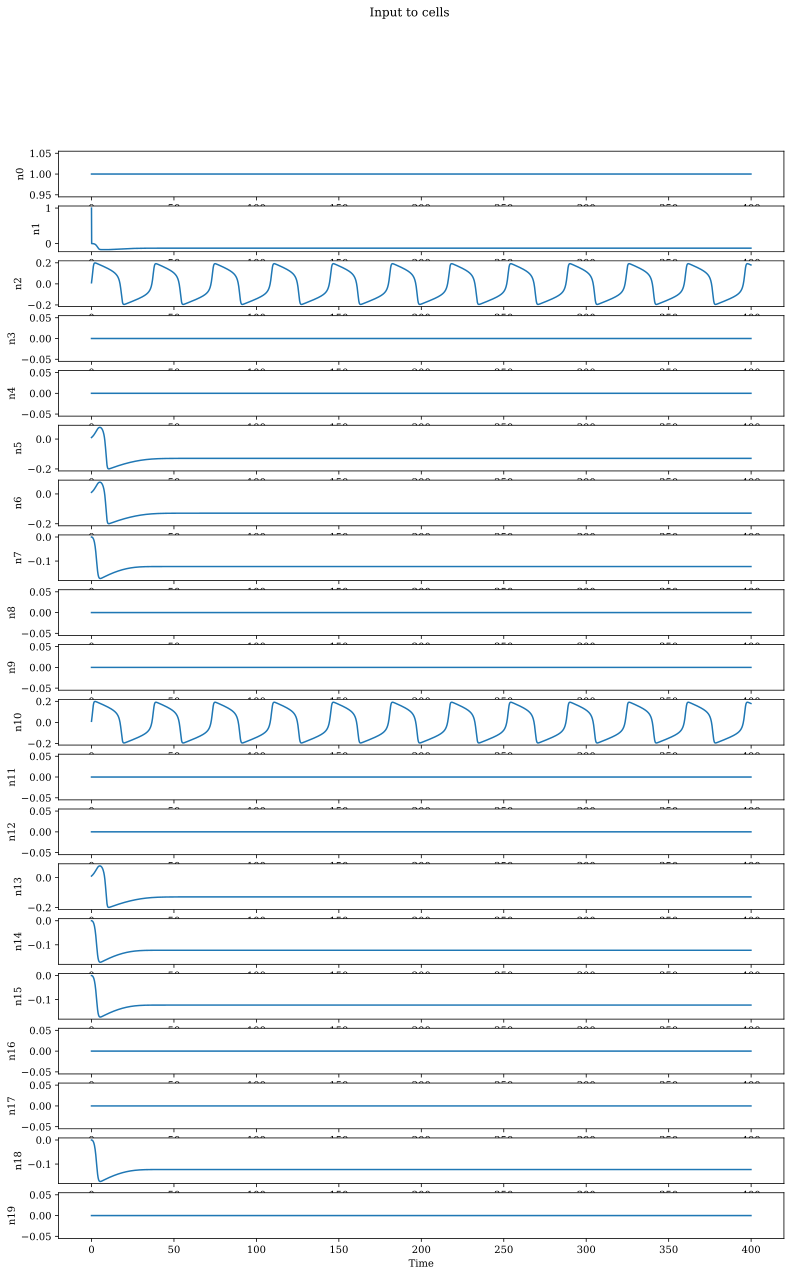

In [6]:
plt.rcParams["figure.figsize"] = (13, numNeurons)
plt.suptitle('Input to cells')
for i in range(numNeurons): 
    plt.subplot(numNeurons,1,i+1)
    plt.plot(b._Neurons[i]._Time, b._Neurons[i]._II)
    plt.ylabel("n{}".format(i))
    plt.xlabel("Time")
plt.show()